# Project: tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis

*  Which geners are most popular from year to year?
*  What kinds of properties are associated with movies that have high revenues?



In [1]:
# Import all packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

#### Reading TMDb Movies Dataset.

In [2]:
# Loading and store csv file to deal with in dataframe
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv',index_col="id")

#### Print some  rows to understand the data

In [3]:
# print first 2 row
df.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Display DataFrame Shape

In [4]:
#Shape to know Nums of row and columns
rows = df.shape[0]
cols = df.shape[1]
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, cols))

There are 10865 total entries of movies and 20 no.of columns in it.


#### Display concise summary of our data frame including Nnumber of non-null values, columns data type

In [5]:
# Print brief summery
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

### Data Cleaning
- Drop unused columns such as [imdb_id,homepage, overview, budget_adj, revenue_adj]
- Check for duplicates values and drop it, if found
- <strong>release_date</strong> is string we need to convert it to datetime
- replace 0 values in numeric columns to NAN to alow us to drop this row later
- Drop rows conatin NAN value

In [6]:
#Drop Unused Columns
#['id','imdb_id','homepage','overview','budget_adj','revenue_adj']
cols = ['imdb_id','homepage','overview','budget_adj','tagline','keywords']
df.drop(cols, axis=1, inplace=True)

print('After Drop unused columns values (Rows, Columns): ', df.shape)

After Drop unused columns values (Rows, Columns):  (10866, 14)


In [7]:
# check for duplicates data
df.duplicated().sum()

1

In [8]:
#Drop duplicates data
df.drop_duplicates(inplace=True)

In [9]:
# Check again for duplicates 
sum(df.duplicated())

0

In [10]:
# Convert release Date to date time
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
# Replace all 0 Values with NAN
df.replace(0,np.nan,inplace=True)

In [12]:
# Drop row tha conatin NA vlaues
df.dropna(inplace=True)

In [13]:
# Check after drop NA Values 
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
revenue_adj             0
dtype: int64

###  Descriptive Statistics
#### Present basic Descriptive Satistics for all columns in our DataFrame


In [14]:
# print Descriptive Statistics
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_adj
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,1.387159e+08
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,2.169973e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,2.370705e+00
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.925371e+07
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,6.284688e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,1.658054e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.827124e+09


In [15]:
def split_column(df,columns,sep):
    '''Takes Dataframe,Columns to split and symbole and return reformatted dataframe'''
    new_df = df
    for c in columns:
        df[c] = df[c].apply(lambda x: x.split(str(sep)))
    
    return new_df

In [16]:
# array of columns need to splite
split_columns = ['genres','cast']

In [17]:
# call split_column function 
df = split_column(df,split_columns,"|")

In [18]:
for c in split_columns:
    df = df.explode(c)

## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from year to year?

In [19]:
#creating a decade column
bin_edges = [1959,1970,1980,1990,2000,2010,2020]
bin_names = ['60s','70s','80s','90s','00s','10s']
df['decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)


#### 1.1 Deacads and Genres

In [20]:
#Grouping decade by decade and genres
df_decade = df.groupby(['decade','genres'],as_index=False).popularity.agg(['mean'])

#### 1.2 Visulaise Genres year by year   

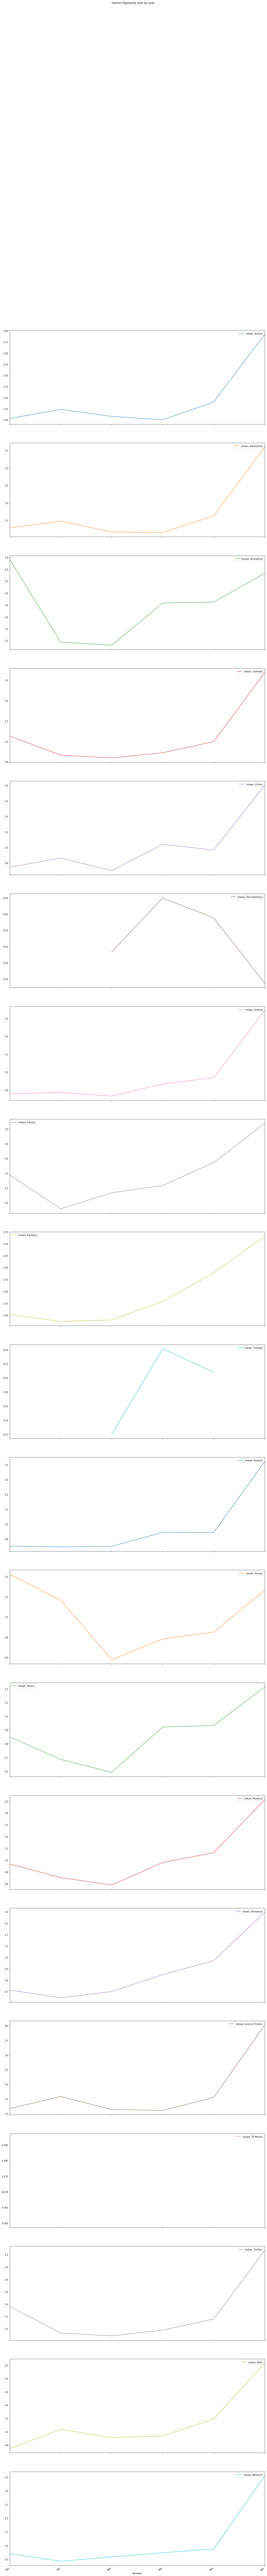

In [21]:
#visualise genres year by year
df_decade.unstack().plot(kind='line', subplots=True, figsize=(20,200))
plt.suptitle('Genres Popularity year by year')
plt.xlabel("decades")
plt.show()

The previous figure shows the number of movies produced in 1960 to 2015 according to their respective movie genres. Almost All genres seem to increase in popularity year to year except some genres like Documentry and Foreign.

### Research Question 2:   What kinds of properties are associated with movies that have high revenues?

#### 2.1 Revenue Avg

In [22]:
# Mean of revenue
Avg_rv = df.describe()['revenue'].mean()
Avg_rv

417776615.7626288

## Budget Avg

In [23]:
df.describe()['budget'].mean()

77726677.02615754

#### 2.2 Highest Movies witch greater than revenue AVG

In [24]:
# highst movies that is grater than the revenue Average
highest_rv_movies = df[df['revenue'] > Avg_rv].sort_values(by=['revenue'], ascending=False)

In [25]:
highest_rv_movies.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,decade
id,,,,,,,,,,,,,,,
19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington,James Cameron,162.0,Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.827124e+09,00s
19995,9.432768,237000000.0,2.781506e+09,Avatar,Stephen Lang,James Cameron,162.0,Fantasy,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.827124e+09,00s
19995,9.432768,237000000.0,2.781506e+09,Avatar,Sigourney Weaver,James Cameron,162.0,Action,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.827124e+09,00s
19995,9.432768,237000000.0,2.781506e+09,Avatar,Zoe Saldana,James Cameron,162.0,Action,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.827124e+09,00s
19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington,James Cameron,162.0,Action,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.827124e+09,00s


In [26]:
#highest_rv_movies.groupby(['original_title','genres'])['revenue'].agg(re='sum')
def count_frequency(data):
    #retuen frequency count for given data
    frequency_count={}
    
    for item in data:
        if item in frequency_count:
            frequency_count[item] += 1
        else:
            frequency_count[item]  = 1
            
    return frequency_count      

#### 2.3 Highest Genres

In [27]:
#Highest Genres
highest_genres = count_frequency(highest_rv_movies.genres)

#### 2.4 Visualize the highest genres

Text(0,0.5,'genre popularity')

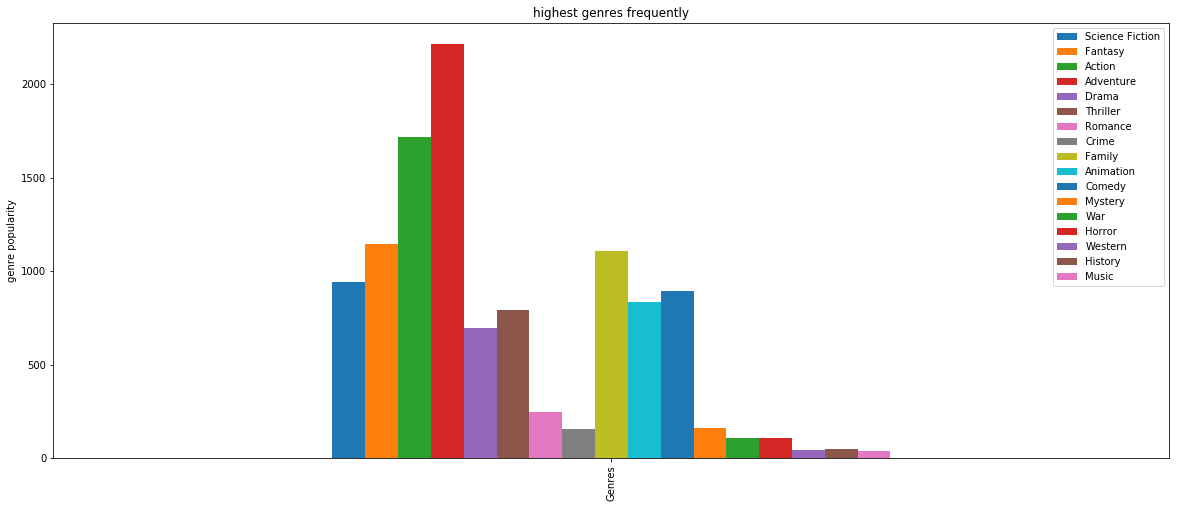

In [28]:
#Visulaise the highest genres
pd.DataFrame(highest_genres, index=['Genres']).plot(kind='bar', figsize=(20, 8))
plt.title('highest genres frequently')
plt.ylabel('genre popularity')


This chart represents the Adventure and Action are most common genres among these movies followed by Fantasy, Family, and Sience Fiction.

#### Descriptive Statistics for the highest revenue movies

In [29]:
# print Descriptive Statistics
highest_rv_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_adj
count,11240.000000,1.124000e+04,1.124000e+04,11240.000000,11240.000000,11240.000000,11240.000000,1.124000e+04
mean,4.174995,1.322964e+08,7.048444e+08,121.327847,2843.830071,6.776957,2006.879893,7.797615e+08
std,3.699420,6.128632e+07,3.176668e+08,24.313361,1801.405684,0.663833,7.787597,3.877384e+08
min,0.142486,7.000000e+06,4.196514e+08,86.000000,48.000000,5.300000,1973.000000,4.039911e+08
25%,2.191033,9.000000e+07,4.974099e+08,101.000000,1572.000000,6.300000,2003.000000,5.380038e+08
50%,3.327799,1.350000e+08,6.091230e+08,117.000000,2549.000000,6.800000,2009.000000,6.661083e+08
75%,4.946136,1.700000e+08,7.989582e+08,138.000000,3699.000000,7.300000,2013.000000,8.755011e+08
max,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.100000,2015.000000,2.827124e+09


#### 2.5 Correlation for Budget and revenue

Text(0,0.5,'revenue')

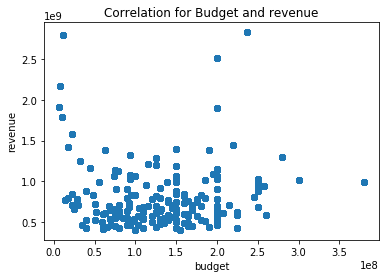

In [30]:
plt.scatter(highest_rv_movies['budget'],highest_rv_movies['revenue_adj']);
plt.title('Correlation for Budget and revenue')
plt.xlabel('budget')
plt.ylabel('revenue')

In [ ]:
This chart represents a positive correlation between the adjasted revenue, and bud.

#### 2.5 Correlation for popularity and revenue

Text(0,0.5,'revenue')

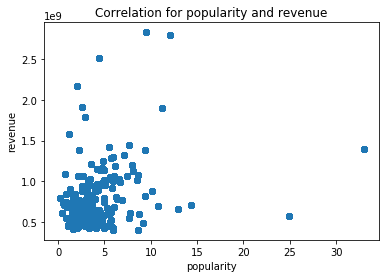

In [31]:
plt.scatter(highest_rv_movies['popularity'],highest_rv_movies['revenue_adj']);
plt.title('Correlation for popularity and revenue')
plt.xlabel('popularity')
plt.ylabel('revenue')

This chart represents a positive correlation between the adjasted revenue, and popularity.


#### 2.5 Correlation for vote_average and revenue

Text(0,0.5,'revenue')

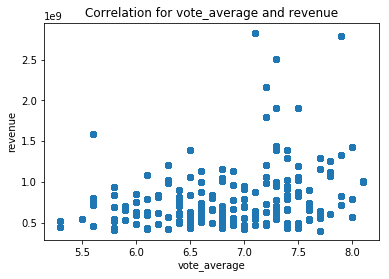

In [32]:
plt.scatter(highest_rv_movies['vote_average'],highest_rv_movies['revenue_adj']);
plt.title('Correlation for vote_average and revenue')
plt.xlabel('vote_average')
plt.ylabel('revenue')

 This chart represents a positive correlation between the adjasted revenue, and vote average. 

#### 2.5 Correlation for runtime and revenue

Text(0,0.5,'revenue')

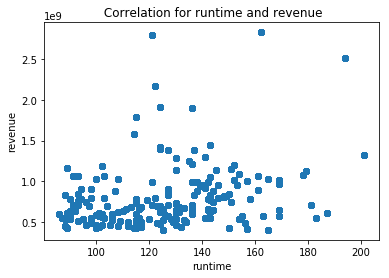

In [33]:
plt.scatter(highest_rv_movies['runtime'],highest_rv_movies['revenue_adj']);
plt.title(' Correlation for runtime and revenue')
plt.xlabel('runtime')
plt.ylabel('revenue')

 This chart represents a positive correlation between djasted revenue, and runtime.

<a id='conclusions'></a>
## Conclusions

* movies produced from 1960 to 2015 seem to increase in popularity year to year except for some genres like Documentry and Foreign.
* Adventure and Action are most common genres among these movies followed by Fantasy, Family, and Sience Fiction

* The average revenue of the movies will be arround 417776615.76 Dollars.

* The average Budget of the movies will be arround 77726677.05 Dollars.

* There is a positive correlation between the adjasted revenue, adjasted budget and popularity


## Limitations

This might not be completely error free.We are not sure if the data provided to us is completely correct and up-to-date. Also, we lost some of the data in the data cleaning steps where we dont know affected our analysis.


### References
 * [Pandas](https://pandas.pydata.org)
 * [matplotlib](https://matplotlib.org/)

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0